In [307]:
#Importing Libraries, Setting Env
import json
from pprint import pprint
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML
pd.set_option('display.max_columns', 35)

#### Sample Data Structure

In [308]:
with open('Raw_Data//refugees to Kenya.json') as f:
    data = json.load(f)
    
#pprint(data['data'])

{'geoMasterId': {'adm': 'Country', <br/>
                 'id': 178,<br/>
                 'lat': 0.537253,<br/>
                 'lon': 37.8802,<br/>
                 'name': 'Kenya'},<br/>
 'source': 'UNHCR',<br/>
 'timeseries': [{'data_date': '2013-12-31',<br/>
                 'individuals': 46176,<br/>
                 'unix_timestamp': 1388448000},<br/>

###  Extract each country data -> turn into csv file

In [309]:
date = []
timestamp = []
individuals = [] 
_country = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    date = []
    timestamp = []
    individuals = [] 
    _country = []
    with open('Raw_Data/refugees to ' + country + '.json') as f:
        data = json.load(f)
        #pprint(data)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)
        
    refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
    refugees_to_all_countries_df.sort_values(by=['timestamp'])
    refugees_to_all_countries_df['period_change'] = refugees_to_all_countries_df['individuals'].diff()
    refugees_to_all_countries_df = refugees_to_all_countries_df.fillna(0.0)
    refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
    refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
    #refugees_to_all_countries_df.to_csv("refugees_to_"+ country +"_cleaned.csv", sep=',')
    print("Refugees To : " + country)
    display(refugees_to_all_countries_df.head(3))
    

Refugees To : DRC


date   timestamp  individuals   to  period_change  Year Month Day
0  2014-10-31  1414713600         1796  DRC            0.0  2014    10  31
1  2014-11-30  1417305600         1796  DRC            0.0  2014    11  30
2  2014-12-31  1419984000         1796  DRC            0.0  2014    12  31

Refugees To : Ethiopia


date   timestamp  individuals        to  period_change  Year Month  \
0  2013-12-31  1388448000        68465  Ethiopia            0.0  2013    12   
1  2014-03-31  1396224000       157422  Ethiopia        88957.0  2014    03   
2  2014-06-30  1404086400       208820  Ethiopia        51398.0  2014    06   

  Day  
0  31  
1  31  
2  30

Refugees To : Kenya


date   timestamp  individuals     to  period_change  Year Month Day
0  2013-12-31  1388448000        46176  Kenya            0.0  2013    12  31
1  2014-03-31  1396224000        63211  Kenya        17035.0  2014    03  31
2  2014-06-30  1404086400        76310  Kenya        13099.0  2014    06  30

Refugees To : Sudan


date   timestamp  individuals     to  period_change  Year Month Day
0  2014-03-31  1396224000        59580  Sudan            0.0  2014    03  31
1  2014-06-30  1404086400        85972  Sudan        26392.0  2014    06  30
2  2014-09-30  1412035200        96603  Sudan        10631.0  2014    09  30

Refugees To : Uganda


date   timestamp  individuals      to  period_change  Year Month Day
0  2012-12-31  1356912000        12524  Uganda            0.0  2012    12  31
1  2013-12-31  1388448000        25274  Uganda        12750.0  2013    12  31
2  2014-03-31  1396224000       118051  Uganda        92777.0  2014    03  31

### Merge all countries data

In [310]:
date = []
timestamp = []
individuals = [] 
_country = []
period_change = []
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

for country in country_list:
    with open('Raw_Data//refugees to ' + country + '.json') as f:
        data = json.load(f)
        data_country = data['data']['timeseries']    
        
    for data in data_country:
        date.append(data['data_date'])
        timestamp.append(data['unix_timestamp'])
        individuals.append(data['individuals'])
        _country.append(country)
        
refugees_to_all_countries_df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals, 'to': _country})
refugees_to_all_countries_df['Year']=[d.split('-')[0] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Month']=[d.split('-')[1] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df['Day']=[d.split('-')[2] for d in refugees_to_all_countries_df.date]
refugees_to_all_countries_df = refugees_to_all_countries_df.sort_values(by=['timestamp'])
refugees_to_all_countries_df.head()
#refugees_to_all_countries_df.to_csv("refugees_to_neighbor_countries_cleaned.csv", sep=',')

date   timestamp  individuals        to  Year Month Day
200  2012-12-31  1356912000        12524    Uganda  2012    12  31
98   2013-12-31  1388448000        46176     Kenya  2013    12  31
49   2013-12-31  1388448000        68465  Ethiopia  2013    12  31
201  2013-12-31  1388448000        25274    Uganda  2013    12  31
146  2014-03-31  1396224000        59580     Sudan  2014    03  31

In [311]:
#Merge all country data with diff
country_list = ['DRC','Ethiopia','Kenya','Sudan','Uganda']

df0 = pd.read_csv("refugees_to_"+ country_list[0] +"_cleaned.csv")
df1 = pd.read_csv("refugees_to_"+ country_list[1] +"_cleaned.csv")
df2 = pd.read_csv("refugees_to_"+ country_list[2] +"_cleaned.csv")
df3 = pd.read_csv("refugees_to_"+ country_list[3] +"_cleaned.csv")
df4 = pd.read_csv("refugees_to_"+ country_list[4] +"_cleaned.csv")
frames = [df0,df1,df2,df3,df4]


In [312]:
refugees_to_all_countries_w_diff = pd.concat(frames)  
refugees_to_all_countries_w_diff = refugees_to_all_countries_w_diff.sort_values(by = ['timestamp'])
refugees_to_all_countries_w_diff.head(10)
refugees_to_all_countries_w_diff.to_csv("refugees_to_neighbor_countries_w_diff.csv", sep=',')

#### Loading file : Refugees from south sudan 

In [313]:
date = []
timestamp = []
individuals = [] 

with open('Raw_Data/refugees from south-sudan all.json') as f:
    data = json.load(f)
    #pprint(data)
    
data_country = data['data']['timeseries']  
for data in data_country:
    date.append(data['data_date'])
    timestamp.append(data['unix_timestamp'])
    individuals.append(data['individuals'])

df = pd.DataFrame({'date': date, 'timestamp': timestamp, 'individuals': individuals})
df['Year']=[d.split('-')[0] for d in df.date]
df['Month']=[d.split('-')[1] for d in df.date]
df['Day']=[d.split('-')[2] for d in df.date]

#df.to_csv('refugees from south-sudan all_cleaned.csv', sep = ',')

In [314]:
df.head(3)

date   timestamp  individuals  Year Month Day
0  2014-03-31  1396224000       398264  2014    03  31
1  2014-06-30  1404086400       513868  2014    06  30
2  2014-09-30  1412035200       589560  2014    09  30

In [315]:
df['Diff'] = df['individuals'].diff()
df.head(3)

date   timestamp  individuals  Year Month Day      Diff
0  2014-03-31  1396224000       398264  2014    03  31       NaN
1  2014-06-30  1404086400       513868  2014    06  30  115604.0
2  2014-09-30  1412035200       589560  2014    09  30   75692.0

In [316]:
#df.to_csv('refugees_from_southsudan_with_difference.csv', sep = ',')

# Visualising Data

## Refugees growth each year

In [317]:
df = pd.read_csv('Cleaned_CsvFiles/refugees_from_southsudan_with_difference.csv')
#df = df.groupby(['Year','Month']).mean()
#df.head(20)

In [318]:
%%HTML
<div class='tableauPlaceholder' id='viz1547905931207' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RefugeesFromSouthSudanTrend&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547905931207');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

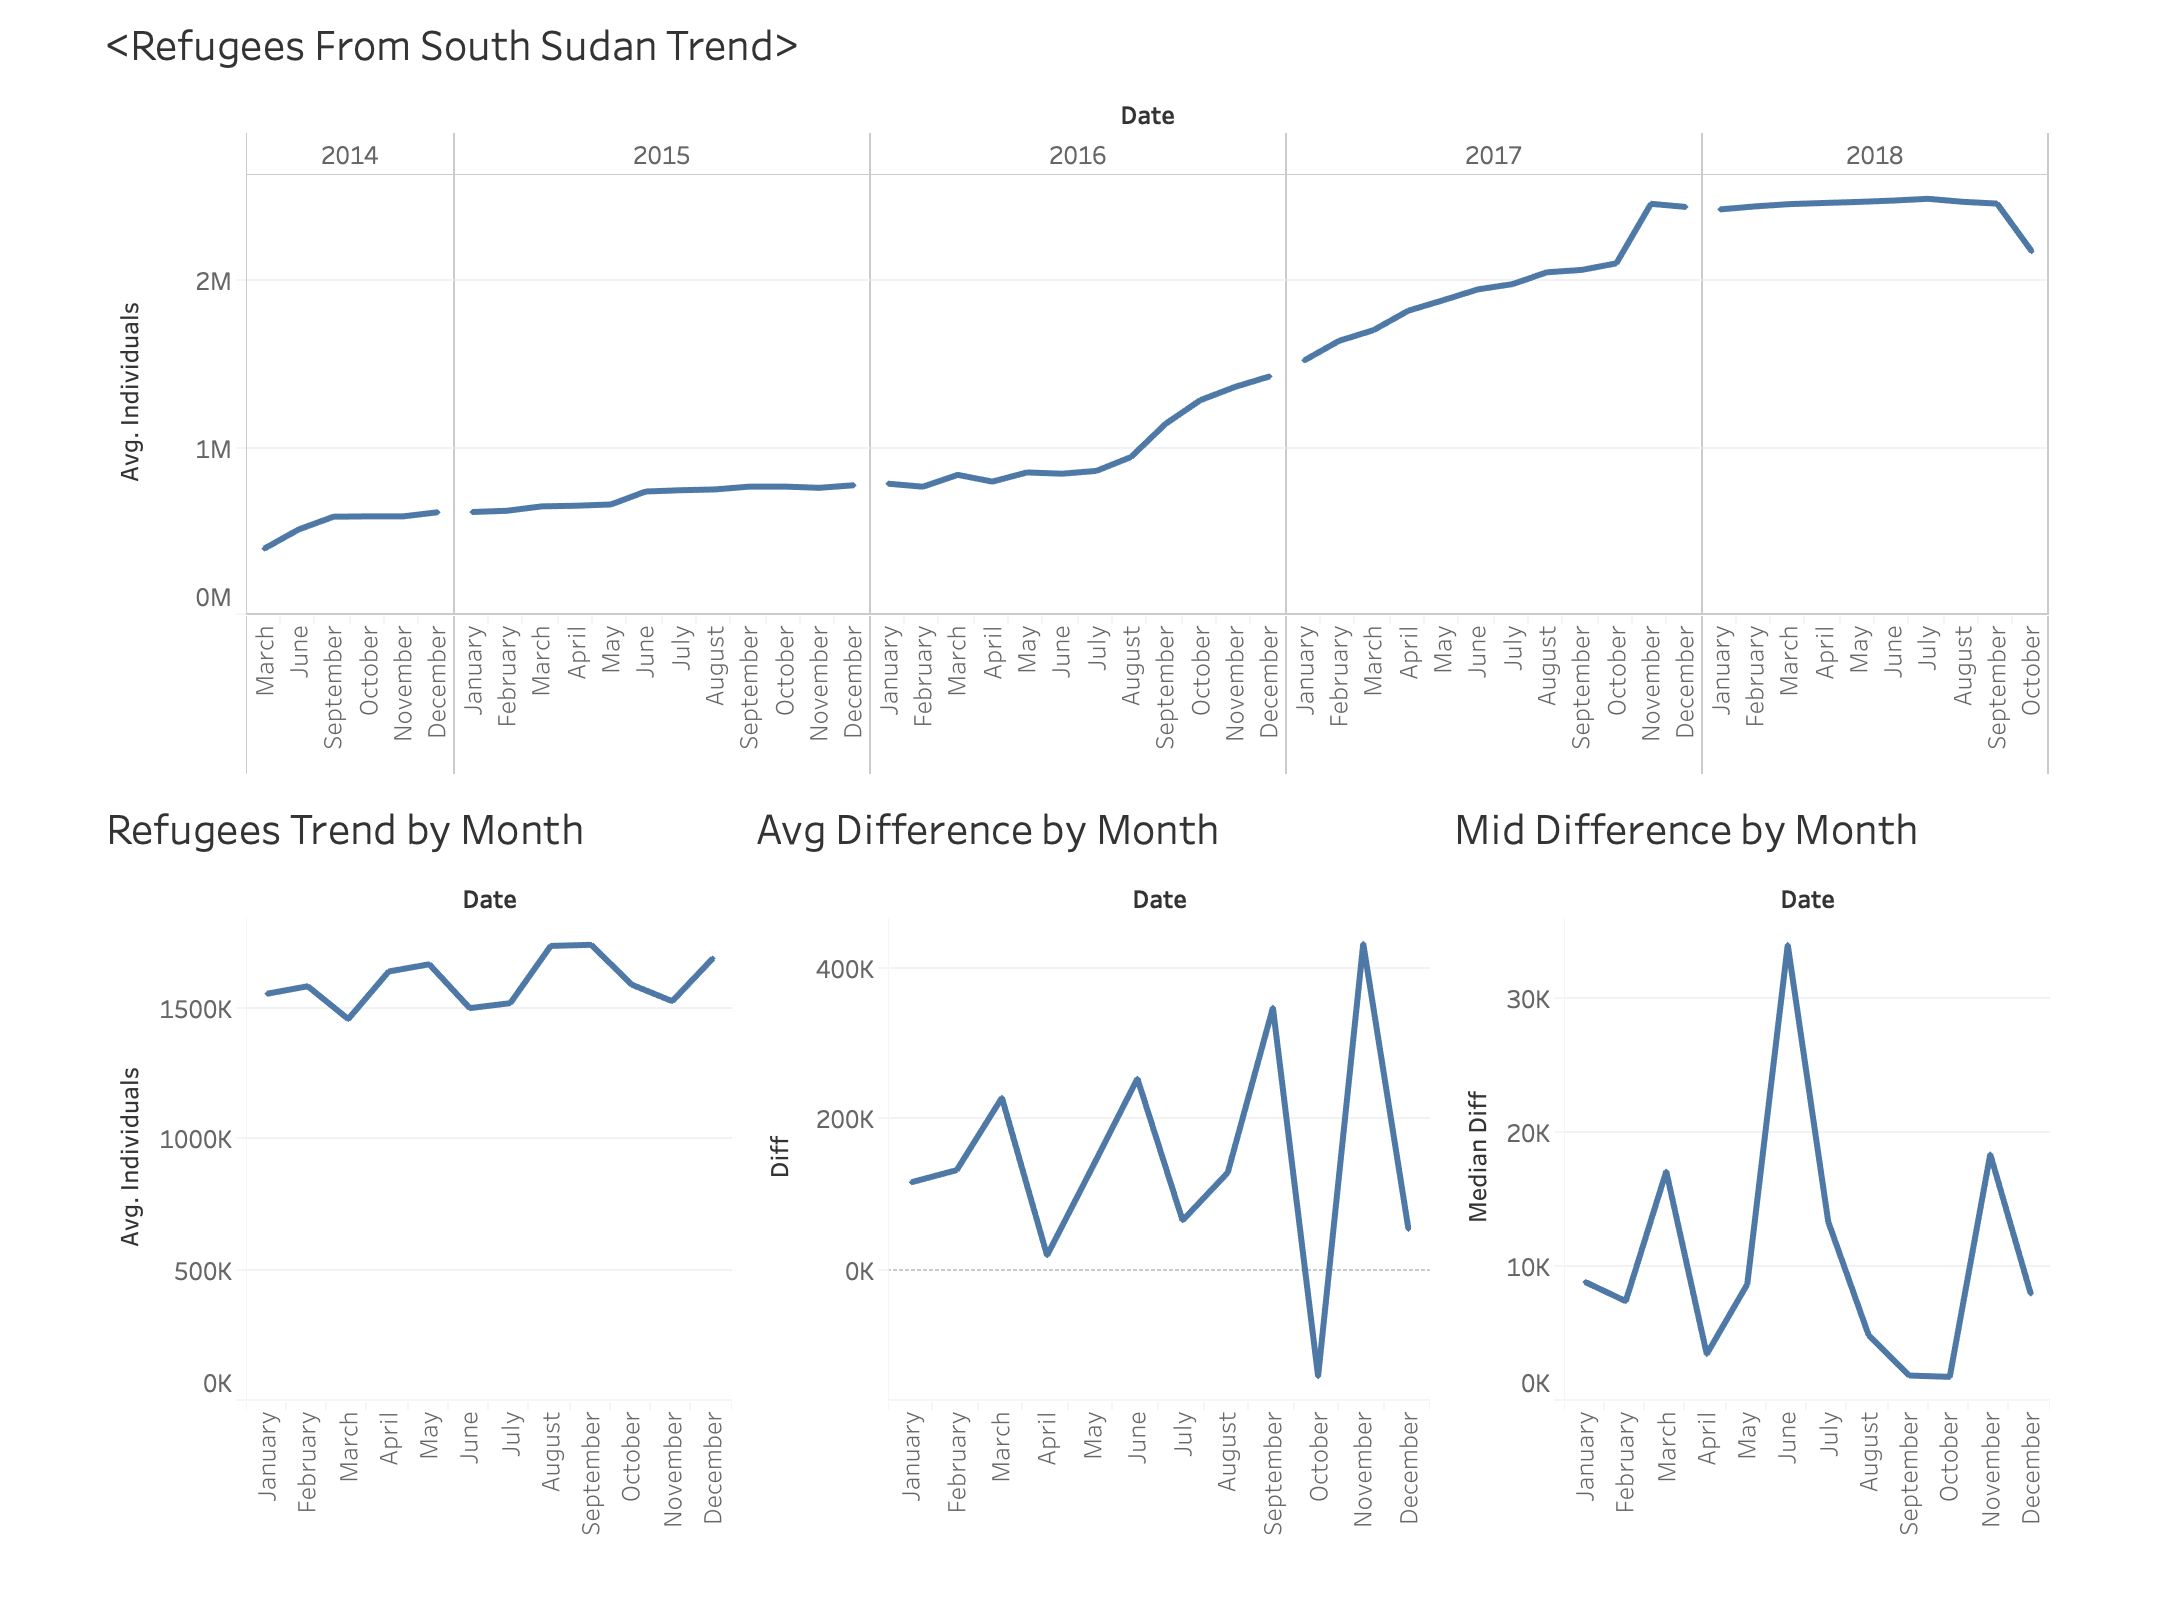

In [47]:
#In case above link doesn't render image in github
Image(filename='img/Refugees_from south_sudan_trend.png') 

Refugees are constantly moving to other countries with about 30,000 people per month in average since 2014. There are a few pinpoints in the graph where some interesting huge drop or increase appears in some months. We will continue to analyze these peaks in the following sections by joining different datasets together to find out the reason from the perspective of data science and by referring to real situations (News). 

Finally, we expect to find some models that can be trained and help us to predict future situations.

##### Huge drop in October 2018
Appearently caused by signing end civil war agreenment. "South Sudan rebel leader Riek Machar returned to the capital Juba on October 31st, 2018 to celebrate a peace deal, more than two years after fierce fighting erupted in the city and forced him to flee the country."(Source: https://www.reuters.com/article/us-southsudan-peaceconference/south-sudan-rebel-leader-machar-returns-to-mark-peace-deal-idUSKCN1N50LI)

### First Try, Prediction of future refugees from South Sudan Using Timeseries Model

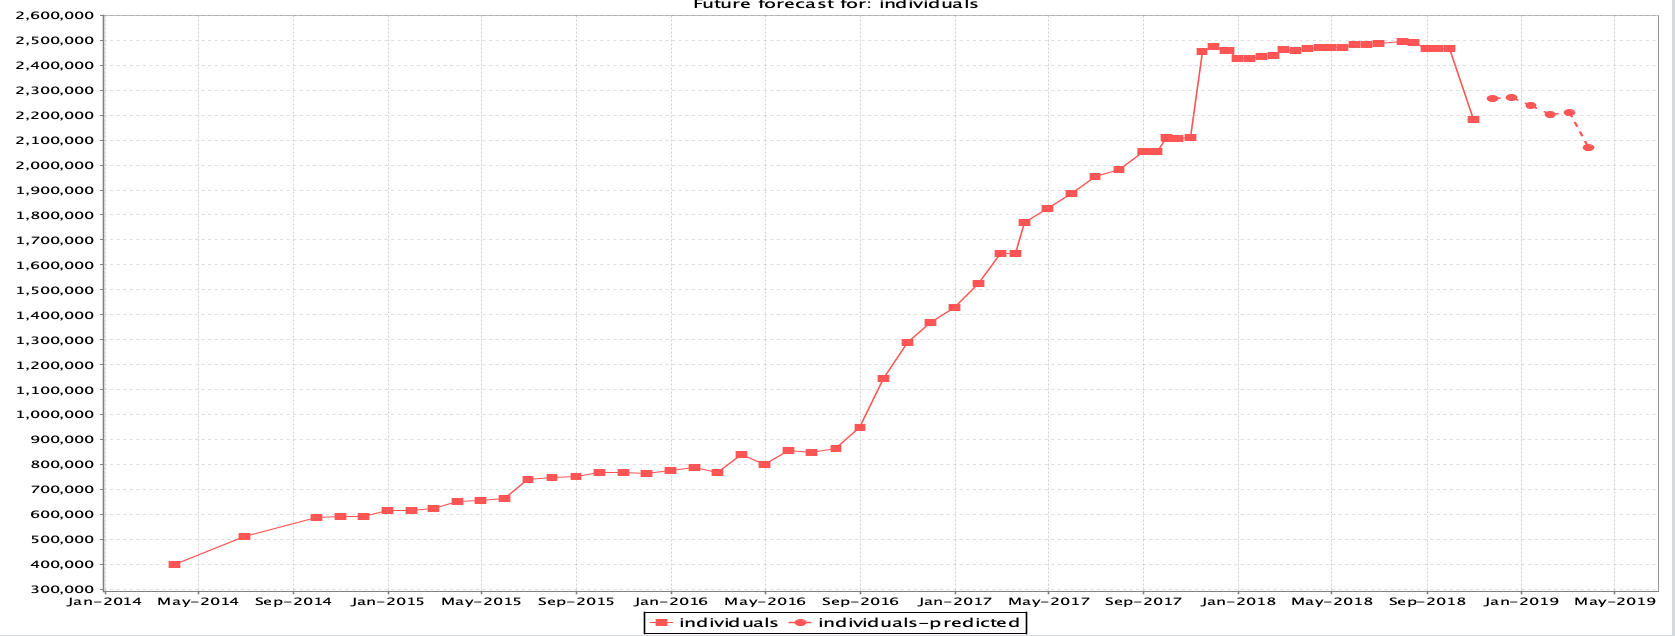

In [49]:
#By Timeseries forecasting
Image(filename='Results_R_From_SS/Forecast_From_SouthSudan_Full.png') 

Prediction: <br/>
2018-11-24*  2265570.3714 <br/>
2018-12-19*  2270693.0898 <br/>
2019-01-12*  2239656.3449 <br/>
2019-02-06*  2201717.8884 <br/>
2019-03-03*  2208591.5167 <br/>
2019-03-27*  2068579.1076 <br/>

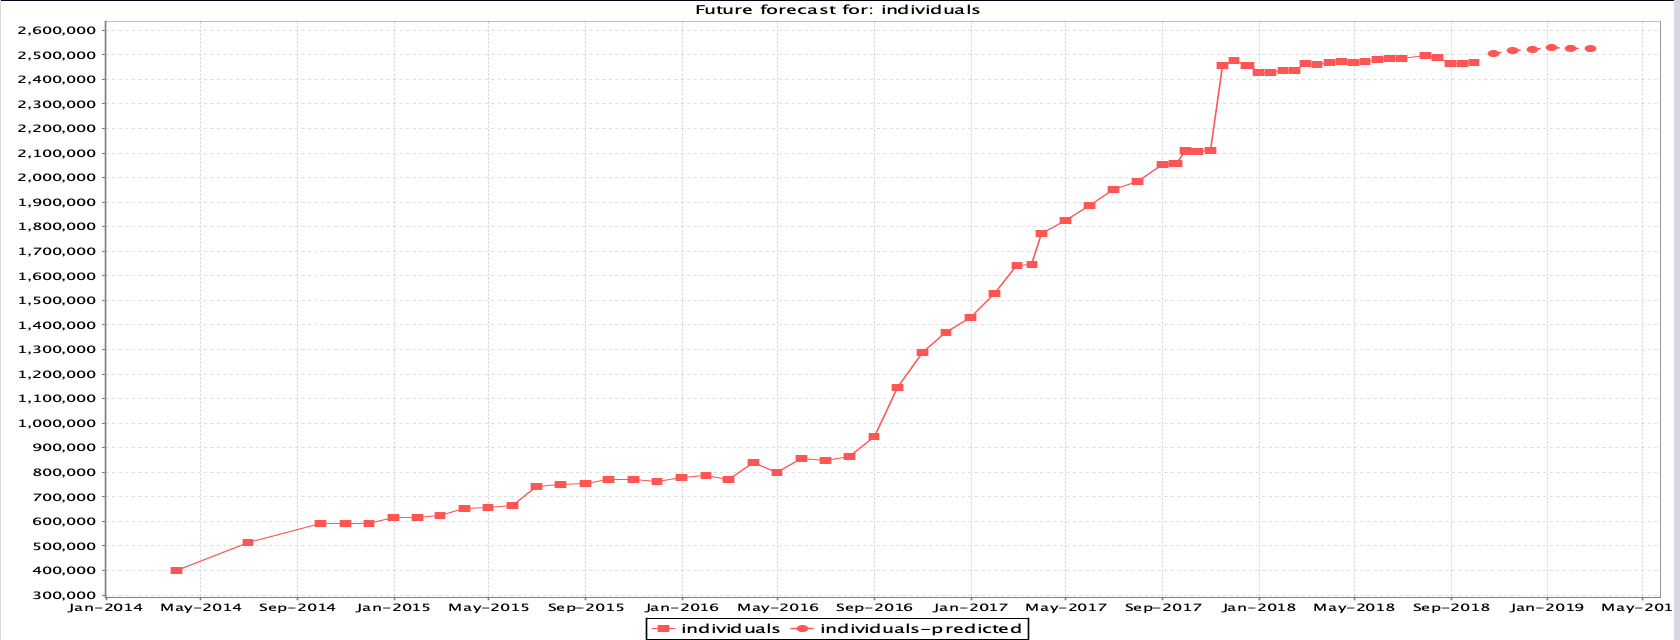

In [50]:
#If remove the huge drop row from the dataset
Image(filename='Results_R_From_SS//Forecast_From_SouthSudan_full_withoutLatest.png') 

### Predict with Linear Regression

=== Classifier model (full training set) ===

Linear Regression Model

individuals =

      0.0185 * timestamp +
-25845083.2239

Time taken to build model: 0 seconds

=== Summary ===

Correlation coefficient                  0.9539

Mean absolute error                 180251.8474

Root mean squared error             229542.1883

Relative absolute error                 24.9258 %

Root relative squared error             29.5765 %

Total Number of Instances               69 

###### The MAE is fucking big (UNPREDICTABLE)

## Refugees to Neighbor Countries

Data visualized <br/>
Ref: https://public.tableau.com/views/Refugeestoneighborhoodcountriestrend/Dashboard1?:embed=y&:display_count=yes&publish=yes

In [51]:
%%HTML
<div class='tableauPlaceholder' id='viz1547925091412' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Refugeestoneighborhoodcountriestrend&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Refugeestoneighborhoodcountriestrend&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Refugeestoneighborhoodcountriestrend&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1547925091412');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

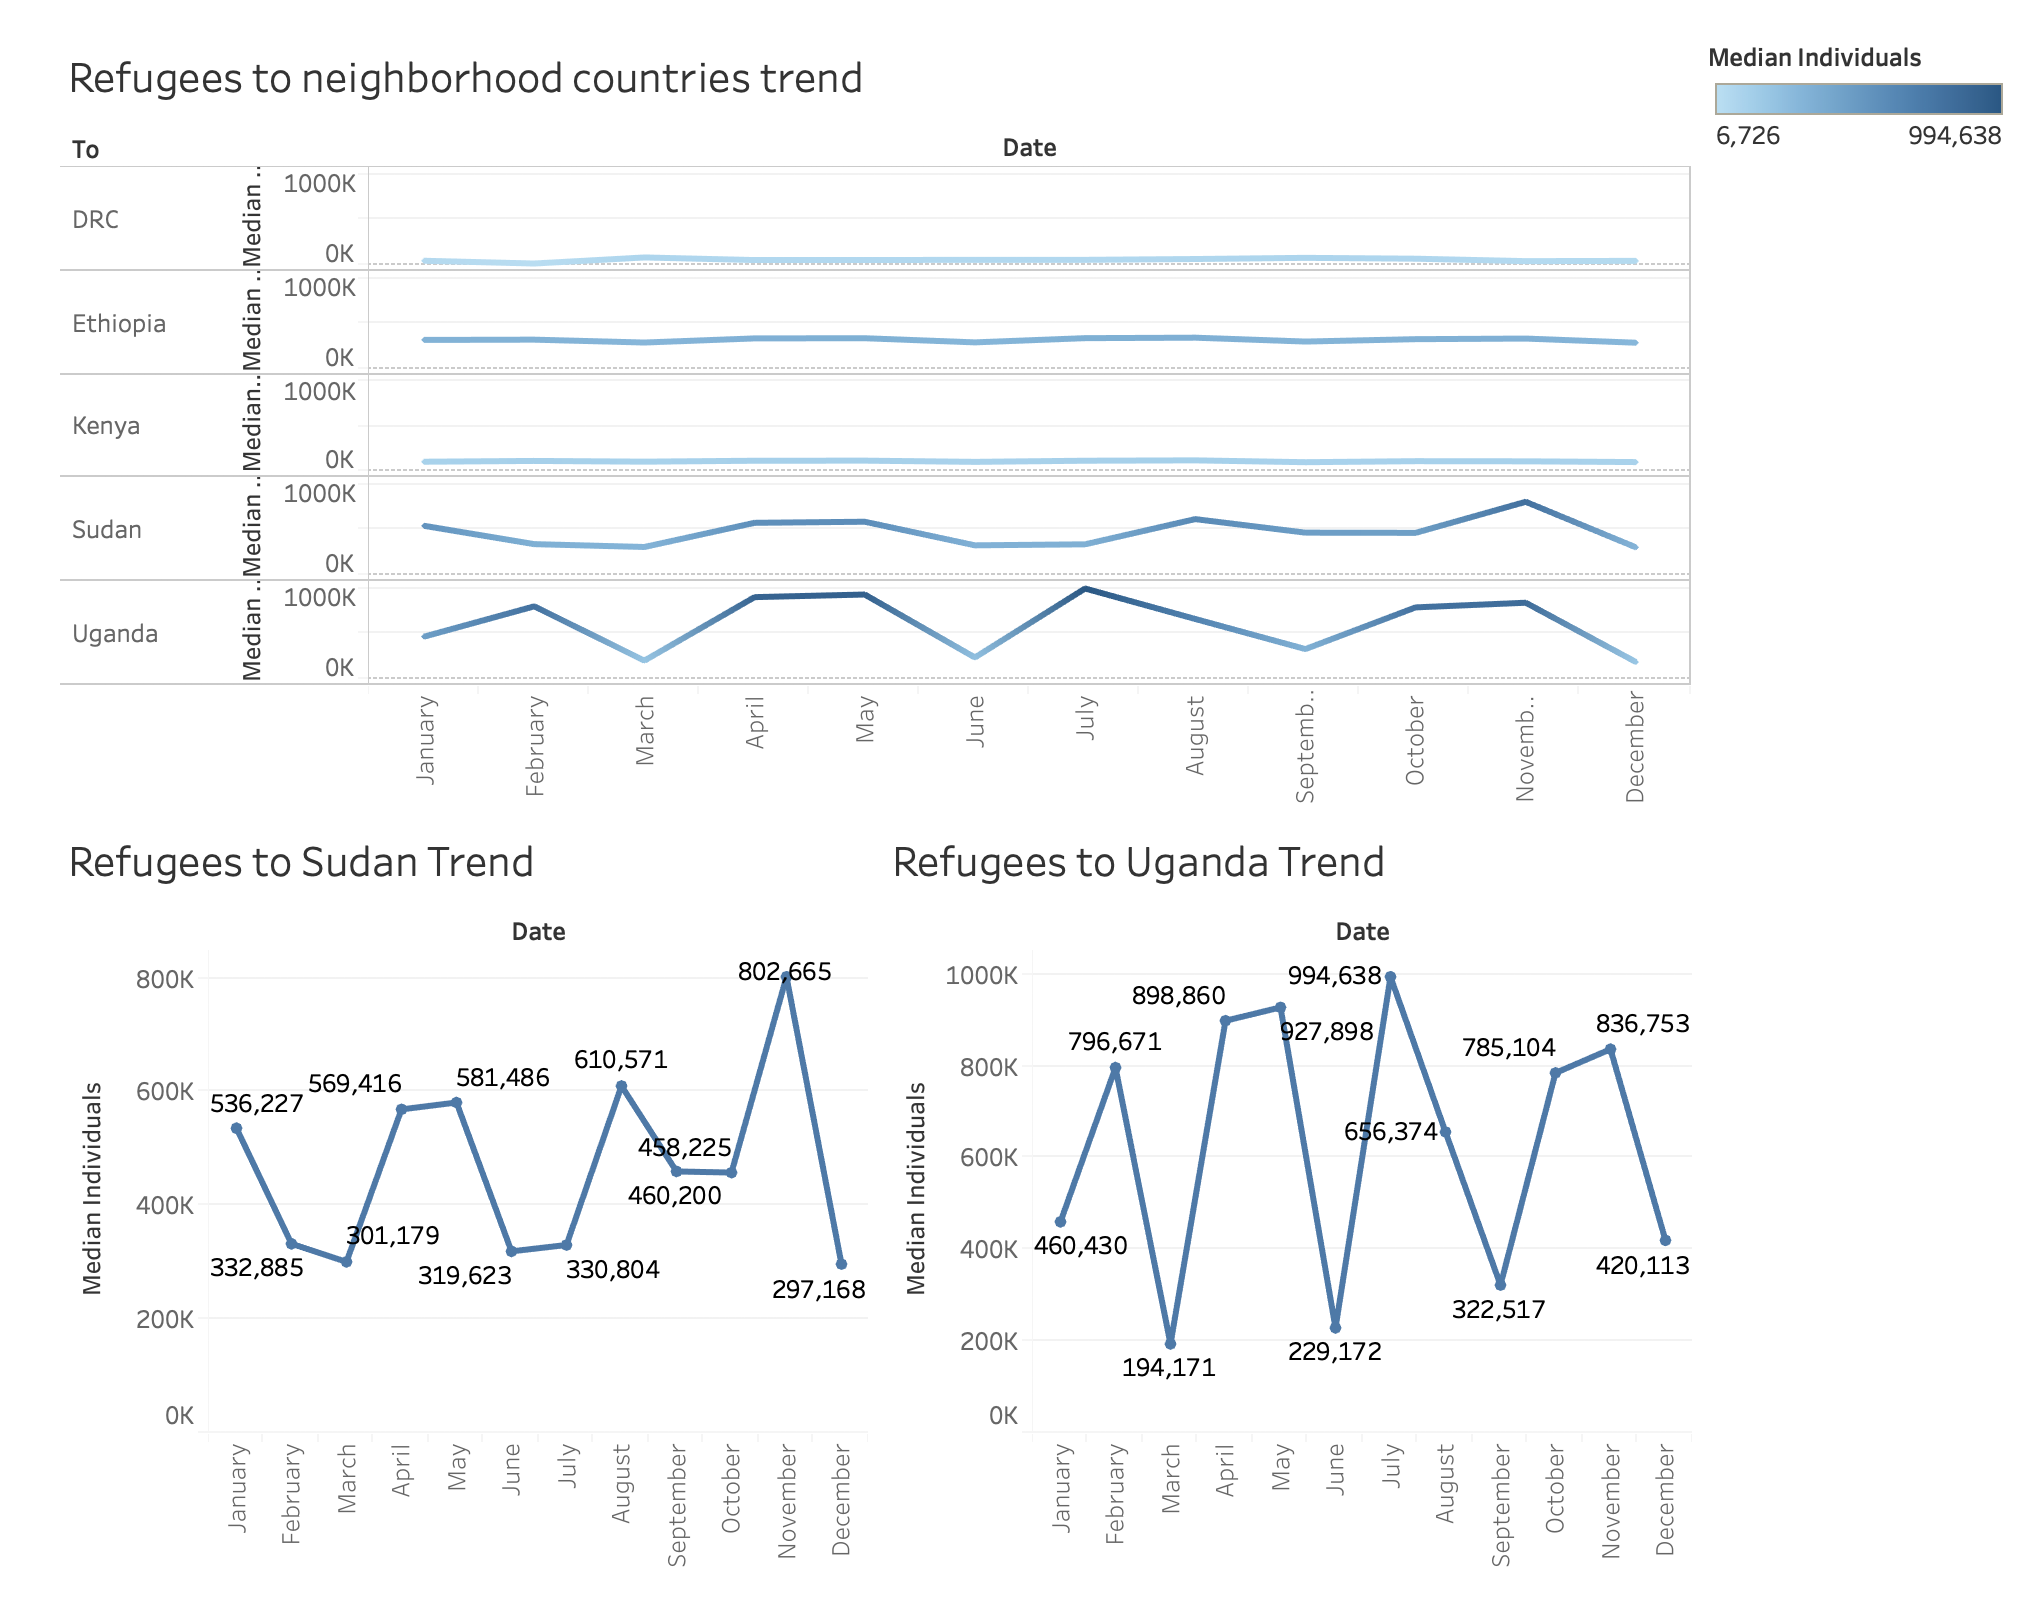

In [52]:
Image(filename='Results_R_To_NC/Dashboard_1.png') 

We first combined the datasets that records which country does the refugees go into one single big dataset. Then we visualize the dataset if there are any correlations between their choices. <br/>

From the first graph <b> Refugees to neighborhood countries trend </b>, we can see that the trend remains stable in DRC, Ethiopia and Kenya. There are no differences among seasons/months. However, for Sudan and Uganda we can see that the line is a lot more curved. <br/>

For this reason, we break down the graph and wanted to look more into what happen in Sudan and Uganda.

In the graph <b> Refugees to Sudan Trend </b> We observe that refugees are most likely to leave Sudan in March, June, July and December. They mostly travel to Sudan in November. And <b> Refugees to Uganda Trend </b> shows refugees leaves Uganda in March and June.

For the following parts, we will try to see if we can find out why refugees travel to / leave Uganda and Sudan in those particular timespots.

## Joining Refugees To [Country]/ From[South Sudan] Together

#Tableau Files
https://public.tableau.com/views/RefugeesFromSouthSudanTrend_2/Dashboard2?:embed=y&:display_count=yes&publish=yes

In [55]:
%%HTML
<div class='tableauPlaceholder' id='viz1548059851501' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend_2&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RefugeesFromSouthSudanTrend_2&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;RefugeesFromSouthSudanTrend_2&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548059851501');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## August - October, 2016 - Restart of civil war (From Juba)

By comparing the two graphs, we found that the increase of south sudanese displacements is caused by a huge increase of refugees going to Uganda in August to October, 2016. The significant increase is also noted by the UN goverment 

<i>"Displacement remained a defining feature of the crisis in South Sudan in September 2016, with tens of thousands of people newly internally displaced, and an average of 2,854 people fleeing across the border to Uganda each day, compared to 1,594 in August and 1,727 in July. During the month, the number of South Sudanese refugees in neighbouring countries passed the one million mark. In addition to the outflow to Uganda, increased arrivals were reported in the Democratic Republic of Congo (DRC) and in Ethiopia, where more than 32,000 South Sudanese arrived in Gambella following reported fighting in parts of Upper Nile, including Nasir, Maban, Mathiang and Maiwut. Inside South Sudan, sporadic clashes in Unity displaced civilians from Kaljak, Ding-Ding, Jazeera, Koch and Buaw into swampy areas and forced the relocation of more than 60 aid workers. In Central Equatoria, an estimated 30,000 people fled into Yei following deadly attacks and looting in nearby villages in mid-September. At the same time, communicable diseases continued to spread, with a new measles outbreak reported in Gogrial West in Warrap and cholera cases confirmed in Fangak in Jonglei."</i>

<i>"According to UNHCR and the Office of the Prime Minister (OPM), there has been an increase in the number of new refugee arrivals from 5 to 11 September 2016, with 24,814 arriving compared to 18,703 and 17,133 in the previous two weeks. Over 92,000 (64 per cent) of the new arrivals are children. <b>Bidibidi settlement in Yumbe is now hosting 72,000 refugees</b>, and the settlement has an estimated capacity for 100,000. Most of these refugees were relocated by OPM and UNHCR1 from Adjumani, Arua, Lamwo and Kiryandongo in order to decongest these camps.
UNHCR and partners conducted a mass nutrition (MUAC) screening in Bidibidi settlement over the past week. Data shows that 262 (5.6%) of the 4,683 children screened between the ages 6 to 59 months were found to be acutely malnourished. Of these, 54 (1.2%) were severely malnourished and 208 (4.4%) were moderately malnourished. 652 children were assessed at entry points of Oraba, Kuluba, Busia and Ocea, and among these, 20 children were diagnosed with malnutrition of which 13 were found to be suffering from Moderate Acute Malnutrition (MAM) and 7 with Severe Acute Malnutrition (SAM). The Global Acute Malnutrition (GAM) rate was low overall at 3.07%. Both the SAM and MAM rates were also low at 1.07% and 2% respectively.
Cumulatively, the number of cholera cases stands at 141 as of 11 September 2016 according to UNICEF field reports. Of these cases, 88 were discharged and 1 case is still admitted in the cholera treatment center. The case was reported to have originated from Amuru District. No case fatality has been registered to date. The number of new cases is steadily declining. This is attributed to efforts by Water, Sanitation and Hygiene (WASH) and Health partners including the district health and water offices, UNHCR, UNICEF, Uganda Red Cross Society (URCS), Lutheran World Federation (LWF), Medicins Sans Frontieres (MSF), Medical Teams International and Danish Refugee Council (DRC) who are actively engaged in the containment of the cholera outbreak."</i>

#### Update:

The increase of refugees in August appearently is caused by the restart of civil war in early July.

<i>Hundreds of South Sudanese refugees are arriving from the border, further swelling the numbers of an overcrowded camp that is already at four times its capacity, and increasing the risk of disease. Crammed into three coaches, these are the latest of more than 88,000 South Sudanese refugees to seek asylum here since early July, when civil war restarted in the world’s newest country. Earlier arrivals reached Uganda by canoe. Now they come by bus.</i>
Source: https://www.theguardian.com/global-development/2016/aug/25/south-sudanese-refugees-scars-civil-war-uganda

#### From Wikipedia

<i> "SPLA soldiers near Juba, shortly after the clashes in the city between followers of Riek Machar and Salva Kiir Mayardit.
Violence erupted in July 2016 after an attack outside of where President Kiir and Riek Machar were meeting in Juba. Fighting spread throughout the city. Over 300 people were killed and over 40 people were injured, including civilians.[196] In the following week, 26,000 fled to neighboring Uganda.[197] Indian Air Force evacuated Indian citizens from the country under Operation Sankat Mochan.[198] A spokesman for Riek Machar announced that South Sudan was "back to war" and that opposition forces based in areas of Juba had been attacked by forces loyal to the President.[199] Fighting involving heavy machine guns, mortars and tanks was reported in several parts of Juba on 10 July. Gun battles broke out near the airport and a UN base forcing the airport to close for safety reasons.[200] President Salva Kiir and first Vice-President Riek Machar ordered a ceasefire after days of intense violence.[201] Machar fled Juba after the clashes. After a 48-hour ultimatum given by Kiir for Machar to return to Juba to progress with the peace agreement talks passed, the SPLA-IO in Juba appointed lead negotiator Taban Deng Gai to replace Machar and the government accepted him as acting vice-president. Machar said any talks would be illegal because Machar had previously fired Gai.[197] Machar, with assistance from the UN, went to exile, first to Kinshasa[202] then to Sudan and then to South Africa, where he was allegedly[203] kept in house arrest.[63]" </i>

### Conflicts in Greater Upper Nile in Mid 2017

<i> "The other major front of the conflict remained the Greater Upper Nile, where government forces mostly fought John Uliny's SPLA-IO allied Agwelek forces. In a study of casualties up to early 2018, the deaths from violence peaked during this time between 2016-2017.[51] In October 2016, the rebels attempted to take Malakal[230] and by January 2017, fighting there had led to civilians deserting the country's second largest city.[231] In fighting in the Bahr el Ghazal region, pro-government militia Mathiang Anyoor attacked Wau killing up to 50 civilians in April 2017.[232] In the same month, SPLA-IO captured Raja, the capital of Lol State, while state governor Hassan claimed the city was immediately retaken.[233][234] A counteroffensive by the government starting in late April 2017 reversed most rebel gains,[235] captured the capital of the Shilluk kingdom, Kodok, from Uliny[236] and closed in on Pagak, which had been the SPLA-IO headquarters since 2014.[237][238] In July 2017, SPLA along with forces loyal to Taban Deng Gai took over the rebel-held town of Maiwut.[239][240][241] The government took over Pagak in August 2017 while the IO rebels still held territory in traditional Nuer areas of Panyijar Country in Unity state and rural areas of Jonglei and Akobo state.[242] SPLA-IO counterattacked Taban Deng Gai's SPLA-IO force, in an attempt to retake Pagak.[243]"</i>

### Joining Datasets together in one file

In [348]:
df_from = pd.read_csv('Cleaned_CsvFiles/refugees_from_southsudan_with_difference.csv')
df_to = pd.read_csv('refugees_to_neighbor_countries_w_diff.csv')
df_to.head()

Unnamed: 0  Unnamed: 0.1        date   timestamp  individuals        to  \
0           0             0  2012-12-31  1356912000        12524    Uganda   
1           0             0  2013-12-31  1388448000        46176     Kenya   
2           0             0  2013-12-31  1388448000        68465  Ethiopia   
3           1             1  2013-12-31  1388448000        25274    Uganda   
4           0             0  2014-03-31  1396224000        59580     Sudan   

   period_change  Year  Month  Day  
0            0.0  2012     12   31  
1            0.0  2013     12   31  
2            0.0  2013     12   31  
3        12750.0  2013     12   31  
4            0.0  2014      3   31

In [349]:
df_to = df_to.drop(columns={'Unnamed: 0','Unnamed: 0.1'})

### Transform & Padding to fill up missing variables

In [350]:
df_to = df_to.pivot_table('period_change',['date','timestamp','Year','Month','Day'],'to').fillna(method='pad')

In [402]:
refugees_movement_records = df_from.merge(df_to, on = ['timestamp'],how='inner')
refugees_movement_records.sort_values(by = ['timestamp'])
refugees_movement_records = refugees_movement_records.drop(columns={'Unnamed: 0'})
refugees_movement_records = refugees_movement_records.dropna()
refugees_movement_records.head(50)

date   timestamp  individuals  Year  Month  Day      Diff      DRC  \
3   2014-10-31  1414713600       591356  2014     10   31    1796.0      0.0   
4   2014-11-30  1417305600       591356  2014     11   30       0.0      0.0   
5   2014-12-31  1419984000       616149  2014     12   31   24793.0      0.0   
6   2015-01-31  1422662400       617634  2015      1   31    1485.0      0.0   
7   2015-02-28  1425081600       625069  2015      2   28    7435.0      0.0   
8   2015-03-31  1427760000       651450  2015      3   31   26381.0    -13.0   
9   2015-04-30  1430352000       655276  2015      4   30    3826.0      0.0   
10  2015-05-31  1433030400       662950  2015      5   31    7674.0      0.0   
11  2015-06-30  1435622400       740522  2015      6   30   77572.0      0.0   
12  2015-07-31  1438300800       748137  2015      7   31    7615.0      0.0   
13  2015-08-31  1440979200       753019  2015      8   31    4882.0      0.0   
14  2015-09-30  1443571200       769975  2015      9   30   16956.0      0.0   
15  2015-10-31  1446249600       770138  2015     10   31     163.0      0.0   
16  2015-11-30  1448841600       762550  2015     11   30   -7588.0      0.0   
17  2015-12-31  1451520000       778072  2015     12   31   15522.0   3813.0   
18  2016-01-31  1454198400       787180  2016      1   31    9108.0   1130.0   
19  2016-02-29  1456704000       769325  2016      2   29  -17855.0      0.0   
20  2016-03-31  1459382400       840498  2016      3   31   71173.0   6185.0   
21  2016-04-30  1461974400       799783  2016      4   30  -40715.0      1.0   
22  2016-05-31  1464652800       854966  2016      5   31   55183.0      0.0   
23  2016-06-30  1467244800       847173  2016      6   30   -7793.0      0.0   
24  2016-07-31  1469923200       864057  2016      7   31   16884.0      0.0   
25  2016-08-31  1472601600       947281  2016      8   31   83224.0  16130.0   
26  2016-09-30  1475193600      1146984  2016      9   30  199703.0  24932.0   
27  2016-10-31  1477872000      1288334  2016     10   31  141350.0   6287.0   
28  2016-11-30  1480464000      1367629  2016     11   30   79295.0   4494.0   
29  2016-12-31  1483142400      1431005  2016     12   31   63376.0   1917.0   
30  2017-01-31  1485820800      1526750  2017      1   31   95745.0   1516.0   
31  2017-02-28  1488240000      1643784  2017      2   28  117034.0   3341.0   
32  2017-03-19  1489881600      1646403  2017      3   19    2619.0   2619.0   
33  2017-03-31  1490918400      1770807  2017      3   31  124404.0   3208.0   
34  2017-04-30  1493510400      1824837  2017      4   30   54030.0      0.0   
35  2017-05-31  1496188800      1887218  2017      5   31   62381.0   2139.0   
36  2017-06-30  1498780800      1952229  2017      6   30   65011.0   1280.0   
37  2017-07-31  1501459200      1984010  2017      7   31   31781.0   1547.0   
38  2017-08-31  1504137600      2055153  2017      8   31   71143.0   2030.0   
39  2017-09-01  1504224000      2055153  2017      9    1       0.0   2030.0   
40  2017-09-15  1505433600      2055930  2017      9   15     777.0   2030.0   
41  2017-09-18  1505692800      2055930  2017      9   18       0.0   2030.0   
42  2017-09-30  1506729600      2110380  2017      9   30   54450.0   1074.0   
43  2017-10-01  1506816000      2105813  2017     10    1   -4567.0   1074.0   
44  2017-10-15  1508025600      2108017  2017     10   15    2204.0   1074.0   
45  2017-10-31  1509408000      2112169  2017     10   31    4152.0   1773.0   
46  2017-11-15  1510704000      2456600  2017     11   15  344431.0   1773.0   
47  2017-11-30  1512000000      2474970  2017     11   30   18370.0    941.0   
48  2017-12-15  1513296000      2457216  2017     12   15  -17754.0    941.0   
49  2017-12-19  1513641600      2457667  2017     12   19     451.0    941.0   
50  2017-12-31  1514678400      2426049  2017     12   31  -31618.0    830.0   
51  2018-01-15  1515974400      2427818  2018      1   15    1769.0    830.0   
52  2018-0

In [ ]:
#Dropped individuals

In [413]:
### ! Check Again, since dates overlap in each month, we use mean when group by month
refugees_movement_records = refugees_movement_records.groupby(by=['Year','Month'], as_index= False)['Diff','DRC','Ethiopia','Kenya','Sudan','Uganda'].mean().round(0)

## Preparing to join ACLED_South Sudan Violence Events together

Tap here for Tableau: https://public.tableau.com/views/SouthSudanViolenceByMonthinEachYearSince2014/Dashboard2?:embed=y&:display_count=yes&publish=yes

In [352]:
%%HTML
<div class='tableauPlaceholder' id='viz1548064484800' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548064484800');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [353]:
%%HTML
<div class='tableauPlaceholder' id='viz1548064513085' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;So&#47;SouthSudanViolenceByMonthinEachYearSince2014&#47;Dashboard3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1548064513085');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1000px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Prepare Violence File

In [361]:
#Read file
violence_events_df = pd.read_csv('Cleaned_CsvFiles/ACLED_south-sudan_cleaned.csv')


In [362]:
dropby = {'Unnamed: 0','data_id','event_date','Day','time_precision','actor1','actor2','interaction_type','region2','region3','location','latitude','longitude','geo_precision'}
violence_events_df = violence_events_df.drop(columns=dropby)
violence_events_df = violence_events_df.rename(columns={'year':'Year'})
violence_events_df.head()

Year                  event_type        actor1_type  \
0  2018  Violence against civilians     Ethnic militia   
1  2018  Violence against civilians  Political militia   
2  2018       Strategic development        Rebel force   
3  2018  Violence against civilians  Political militia   
4  2018  Violence against civilians     Ethnic militia   

                    actor2_type                 region1  fatalities  Month  
0                     Civilians                   Lakes           2     11  
1                     Civilians  Western Bahr el Ghazal           1     11  
2  Government or mutinous force       Central Equatoria           0     11  
3                     Civilians       Eastern Equatoria           0     11  
4                     Civilians                 Jonglei          10     10

In [363]:
violence_events_df['count'] = 1
violence_events_df.tail()

Year                     event_type  actor1_type  \
5254  2011          Strategic development  Rebel force   
5255  2011  Battle-No change of territory  Rebel force   
5256  2011     Violence against civilians  Rebel force   
5257  2011  Battle-No change of territory  Rebel force   
5258  2011     Violence against civilians  Rebel force   

                       actor2_type                 region1  fatalities  Month  \
5254                             0       Central Equatoria           0      8   
5255  Government or mutinous force                 Jonglei           1      7   
5256                     Civilians  Western Bahr el Ghazal           0      7   
5257                Ethnic militia                 Jonglei           0      7   
5258                     Civilians  Western Bahr el Ghazal           0      7   

      count  
5254      1  
5255      1  
5256      1  
5257      1  
5258      1

### Transform data into counting how many type of events happen each month / how many events happen in each region each month

#### Transform -> Violence events by region in each month

In [381]:
violence_events_by_region_month = violence_events_df.groupby(by=['Year','Month','region1'],as_index=False)['count'].sum()
violence_events_by_region_month = pd.pivot_table(violence_events_by_region_month, values = 'count', index = ['Year', 'Month'], columns = ['region1'], aggfunc=np.sum).reset_index()

col_list= list(violence_events_by_region_month)
col_list.remove('Year')
col_list.remove('Month')
violence_events_by_region_month['total_events'] = violence_events_by_region_month[col_list].sum(axis = 1)
violence_events_by_region_month = violence_events_by_region_month.fillna(0.0)

violence_events_by_region_month.head()

region1  Year  Month  Central Equatoria  Eastern Equatoria  Gogrial  Jonglei  \
0        2011      7                0.0                0.0      0.0      2.0   
1        2011      8                1.0                0.0      0.0      8.0   
2        2011      9                0.0                0.0      0.0      2.0   
3        2011     10                1.0                0.0      0.0      1.0   
4        2011     11                0.0                0.0      0.0      0.0   

region1  Lakes  Northern Bahr el Ghazal  Unity  Upper Nile  Warrap  \
0          0.0                      0.0    0.0         0.0     0.0   
1          0.0                      2.0    1.0         7.0     0.0   
2          0.0                      0.0    0.0         0.0     0.0   
3          0.0                      0.0    3.0         0.0     0.0   
4          0.0                      0.0    3.0         2.0     0.0   

region1  Western Bahr el Ghazal  Western Equatoria  total_events  
0                           2.0                0.0           4.0  
1                           0.0                0.0          19.0  
2                           2.0                0.0           4.0  
3                           0.0                0.0           5.0  
4                           1.0                2.0           8.0

In [385]:
# Save File
violence_events_by_region_month.to_csv("violence_events_by_region_month.csv", sep = ",")

#### Transform -> Violence events by type in each month

In [386]:
violence_events_by_type_month = violence_events_df.groupby(by=['Year','Month','event_type'],as_index=False)['count'].sum()
violence_events_by_type_month = pd.pivot_table(violence_events_by_type_month, values = 'count', index = ['Year', 'Month'], columns = ['event_type'], aggfunc=np.sum).reset_index()
col_list= list(violence_events_by_type_month)
col_list.remove('Year')
col_list.remove('Month')
violence_events_by_type_month['total_events'] = violence_events_by_type_month[col_list].sum(axis = 1)
violence_events_by_type_month = violence_events_by_type_month.fillna(0.0)
violence_events_by_type_month.head()

event_type  Year  Month  Battle-Government regains territory  \
0           2011      7                                  0.0   
1           2011      8                                  1.0   
2           2011      9                                  0.0   
3           2011     10                                  0.0   
4           2011     11                                  0.0   

event_type  Battle-No change of territory  \
0                                     2.0   
1                                     8.0   
2                                     2.0   
3                                     2.0   
4                                     1.0   

event_type  Battle-Non-state actor overtakes territory  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   

event_type  Headquarters or base established  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

event_type  Non-violent transfer of territory  Remote violence  \
0                                         0.0              0.0   
1                                         0.0              2.0   
2                                         0.0              0.0   
3                                         0.0              1.0   
4                                         0.0              3.0   

event_type  Riots/Protests  Strategic development  Violence against civilians  \
0                      0.0                    0.0                         2.0   
1                      0.0                    1.0                         7.0   
2                      0.0                    0.0                         2.0   
3                      1.0                    0.0                         1.0   
4                      0.0                    3.0                         1.0   

event_type  total_events  
0                    4.0  
1                   19.0  
2                    4.0  
3                    5.0  
4                    8.0

In [387]:
# Save File
violence_events_by_type_month.to_csv("violence_events_by_type_month.csv", sep = ",")

## Join refugees movements together

#### Join Refugees movements in each month with violence events by region in each month

In [425]:
refugees_movement_with_violence_region_by_month = violence_events_by_region_month.merge(refugees_movement_records, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_with_violence_region_by_month.head(5)






Year  Month  Central Equatoria  Eastern Equatoria  Gogrial  Jonglei  Lakes  \
0  2014     10                6.0                1.0      0.0      3.0   12.0   
1  2014     11                4.0                3.0      0.0     12.0    2.0   
2  2014     12                3.0                5.0      0.0     11.0    6.0   
3  2015      1                7.0                2.0      0.0      4.0    6.0   
4  2015      2                5.0                5.0      0.0     10.0    2.0   

   Northern Bahr el Ghazal  Unity  Upper Nile  Warrap  Western Bahr el Ghazal  \
0                      1.0    8.0        14.0     0.0                     1.0   
1                      0.0    3.0        12.0     2.0                     3.0   
2                      0.0    3.0         6.0     6.0                     4.0   
3                      1.0   13.0        16.0     1.0                     8.0   
4                      0.0    8.0        20.0     2.0                     1.0   

   Western Equatoria  total_events     Diff  DRC  Ethiopia    Kenya    Sudan  \
0                2.0          48.0   1796.0  0.0   46751.0  10895.0  10631.0   
1                3.0          44.0      0.0  0.0   46751.0  10895.0  10631.0   
2                4.0          48.0  24793.0  0.0   -4026.0   2269.0  18848.0   
3                3.0          61.0   1485.0  0.0    1485.0   2269.0  18848.0   
4                2.0          55.0   7435.0  0.0    7435.0   2269.0  18848.0   

   Uganda  
0  7415.0  
1  7415.0  
2  7702.0  
3  7702.0  
4  7702.0

In [426]:
refugees_movement_with_violence_region_by_month.to_csv('refugees_movement_with_violence_region_by_month.csv',sep=',')

#### Join Refugees movements in each month with violence events by type in each month

In [427]:
refugees_movement_with_violence_type_by_month = violence_events_by_type_month.merge(refugees_movement_records, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_with_violence_type_by_month.head(5)








Year  Month  Battle-Government regains territory  \
0  2014     10                                  0.0   
1  2014     11                                  2.0   
2  2014     12                                  1.0   
3  2015      1                                  0.0   
4  2015      2                                  0.0   

   Battle-No change of territory  Battle-Non-state actor overtakes territory  \
0                           23.0                                         1.0   
1                           20.0                                         1.0   
2                           21.0                                         1.0   
3                           25.0                                         1.0   
4                           19.0                                         0.0   

   Headquarters or base established  Non-violent transfer of territory  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Remote violence  Riots/Protests  Strategic development  \
0              3.0             9.0                    0.0   
1              6.0             6.0                    0.0   
2              4.0             2.0                    2.0   
3              6.0             3.0                    5.0   
4              9.0             2.0                    4.0   

   Violence against civilians  total_events     Diff  DRC  Ethiopia    Kenya  \
0                        12.0          48.0   1796.0  0.0   46751.0  10895.0   
1                         9.0          44.0      0.0  0.0   46751.0  10895.0   
2                        17.0          48.0  24793.0  0.0   -4026.0   2269.0   
3                        21.0          61.0   1485.0  0.0    1485.0   2269.0   
4                        21.0          55.0   7435.0  0.0    7435.0   2269.0   

     Sudan  Uganda  
0  10631.0  7415.0  
1  10631.0  7415.0  
2  18848.0  7702.0  
3  18848.0  7702.0  
4  18848.0  7702.0

In [428]:
refugees_movement_with_violence_type_by_month.describe()

Year      Month  Battle-Government regains territory  \
count    49.000000  49.000000                            49.000000   
mean   2016.285714   6.571429                             2.081633   
std       1.224745   3.488075                             4.081650   
min    2014.000000   1.000000                             0.000000   
25%    2015.000000   4.000000                             0.000000   
50%    2016.000000   7.000000                             1.000000   
75%    2017.000000  10.000000                             2.000000   
max    2018.000000  12.000000                            26.000000   

       Battle-No change of territory  \
count                      49.000000   
mean                       33.530612   
std                        10.595011   
min                        11.000000   
25%                        26.000000   
50%                        33.000000   
75%                        42.000000   
max                        57.000000   

       Battle-Non-state actor overtakes territory  \
count                                   49.000000   
mean                                     2.142857   
std                                      2.590045   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      3.000000   
max                                     12.000000   

       Headquarters or base established  Non-violent transfer of territory  \
count                         49.000000                          49.000000   
mean                           0.061224                           0.142857   
std                            0.316765                           0.353553   
min                            0.000000                           0.000000   
25%                            0.000000                           0.000000   
50%                            0.000000                           0.000000   
75%                            0.000000                           0.000000   
max                            2.000000                           1.000000   

       Remote violence  Riots/Protests  Strategic development  \
count        49.000000       49.000000              49.000000   
mean          2.734694        3.367347               6.142857   
std           2.612275        2.489092               4.198214   
min           0.000000        0.000000               0.000000   
25%           0.000000        2.000000               2.000000   
50%           2.000000        3.000000               6.000000   
75%           5.000000        5.000000              10.000000   
max           9.000000       11.000000              16.000000   

       Violence against civilians  total_events           Diff           DRC  \
count                   49.000000     49.000000      49.000000     49.000000   
mean                    26.061224     76.265306   26955.510204   1887.367347   
std                     12.766180     25.622887   67731.322525   4264.752097   
min                      9.000000     36.000000 -286595.000000    -13.000000   
25%                     17.000000     57.000000    1485.000000      0.000000   
50%                     23.000000     72.000000    9814.000000    735.000000   
75%                     32.000000     98.000000   63376.000000   1547.000000   
max                     70.000000    148.000000  199703.000000  24932.000000   

           Ethiopia         Kenya          Sudan         Uganda  
count     49.000000     49.000000      49.000000      49.000000  
mean    4472.918367   1135.979592   14752.979592   16051.142857  
std    12065.019225   3817.437467   29226.287508   54616.441254  
min   -24471.000000 -16217.000000  -25774.000000 -288021.000000  
25%     1178.000000    134.000000    1355.000000    7415.000000  
50%     2530.000000   1281.000000    5302.000000   11999.000000  
75%     6803.000000   2473.000000   18848.000000   19691.000000  
max   

In [429]:
refugees_movement_with_violence_type_by_month.to_csv('refugees_movement_with_violence_type_by_month.csv',sep=',')

### Join Everything Together

In [430]:
refugees_movement_w_violence_region_and_type_by_month = violence_events_by_region_month.merge(refugees_movement_with_violence_type_by_month, 
                                                                    on = ['Year','Month'], how = 'inner')
refugees_movement_w_violence_region_and_type_by_month.head(5)

Year  Month  Central Equatoria  Eastern Equatoria  Gogrial  Jonglei  Lakes  \
0  2014     10                6.0                1.0      0.0      3.0   12.0   
1  2014     11                4.0                3.0      0.0     12.0    2.0   
2  2014     12                3.0                5.0      0.0     11.0    6.0   
3  2015      1                7.0                2.0      0.0      4.0    6.0   
4  2015      2                5.0                5.0      0.0     10.0    2.0   

   Northern Bahr el Ghazal  Unity  Upper Nile  Warrap  Western Bahr el Ghazal  \
0                      1.0    8.0        14.0     0.0                     1.0   
1                      0.0    3.0        12.0     2.0                     3.0   
2                      0.0    3.0         6.0     6.0                     4.0   
3                      1.0   13.0        16.0     1.0                     8.0   
4                      0.0    8.0        20.0     2.0                     1.0   

   Western Equatoria  total_events_x  Battle-Government regains territory  \
0                2.0            48.0                                  0.0   
1                3.0            44.0                                  2.0   
2                4.0            48.0                                  1.0   
3                3.0            61.0                                  0.0   
4                2.0            55.0                                  0.0   

   Battle-No change of territory  Battle-Non-state actor overtakes territory  \
0                           23.0                                         1.0   
1                           20.0                                         1.0   
2                           21.0                                         1.0   
3                           25.0                                         1.0   
4                           19.0                                         0.0   

   Headquarters or base established  Non-violent transfer of territory  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Remote violence  Riots/Protests  Strategic development  \
0              3.0             9.0                    0.0   
1              6.0             6.0                    0.0   
2              4.0             2.0                    2.0   
3              6.0             3.0                    5.0   
4              9.0             2.0                    4.0   

   Violence against civilians  total_events_y     Diff  DRC  Ethiopia  \
0                        12.0            48.0   1796.0  0.0   46751.0   
1                         9.0            44.0      0.0  0.0   46751.0   
2                        17.0            48.0  24793.0  0.0   -4026.0   
3                        21.0            61.0   1485.0  0.0    1485.0   
4                        21.0            55.0   7435.0  0.0    7435.0   

     Kenya    Sudan  Uganda  
0  10895.0  10631.0  7415.0  
1  10895.0  10631.0  7415.0  
2   2269.0  18848.0  7702.0  
3   2269.0  18848.0  7702.0  
4   2269.0  18848.0  7702.0

### Assign some classes to the data ** Working

In [421]:
def set_movement_aggresiveness(row):
    if row["Diff"] > 48467:
        return "Big Move Away"
    elif row['Diff'] <= 48467 and row['Diff'] > 6158:
        return "Middle Move Away"
    elif row['Diff'] <= 6158 and row['Diff'] > 235:
        return "Small Move Away"
    else:
        return "Big Move Back"
    
refugees_movement_with_violence_type_by_month = refugees_movement_with_violence_type_by_month.assign(status = refugees_movement_with_violence_event_type.apply(set_movement_aggresiveness, axis = 1))
refugees_movement_with_violence_type_by_month.head(3)

Year  Month  Battle-Government regains territory  \
0  2014     10                                  0.0   
1  2014     11                                  2.0   
2  2014     12                                  1.0   

   Battle-No change of territory  Battle-Non-state actor overtakes territory  \
0                           23.0                                         1.0   
1                           20.0                                         1.0   
2                           21.0                                         1.0   

   Headquarters or base established  Non-violent transfer of territory  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   

   Remote violence  Riots/Protests  Strategic development  \
0              3.0             9.0                    0.0   
1              6.0             6.0                    0.0   
2              4.0             2.0                    2.0   

   Violence against civilians  total_events     Diff  DRC  Ethiopia    Kenya  \
0                        12.0          48.0   1796.0  0.0   46751.0  10895.0   
1                         9.0          44.0      0.0  0.0   46751.0  10895.0   
2                        17.0          48.0  24793.0  0.0   -4026.0   2269.0   

     Sudan  Uganda            status  
0  10631.0  7415.0   Small Move Away  
1  10631.0  7415.0     Big Move Back  
2  18848.0  7702.0  Middle Move Away

In [422]:
refugees_movement_with_violence_type_by_month.status.value_counts()

Big Move Away       17
Big Move Back       11
Middle Move Away    11
Small Move Away     10
Name: status, dtype: int64

In [395]:
refugees_movement_with_violence_type_by_month.to_csv('refugees_movement_with_violence_type_by_month.csv',sep= ',')

In [301]:
def define_big_movements(row):
    country = ['DRC','Ethiopia','Kenya','Sudan','Uganda']
    max_diff = ""
    second_max_diff = ""
    for i in range(0, len(country) - 1):
        if row[country[i + 1]] > row[country[i]]:
            max_diff = country[i + 1]
    return max_diff
    
need_to_change = need_to_change.assign(most_likely_to = need_to_change.apply(define_big_movements, axis = 1))
need_to_change.head()
#refugees_movement_records.describe()

Year  Month  Central Equatoria  Eastern Equatoria  Gogrial  Jonglei  Lakes  \
0  2014     10                6.0                1.0      0.0      3.0   12.0   
1  2014     11                4.0                3.0      0.0     12.0    2.0   
2  2014     12                3.0                5.0      0.0     11.0    6.0   
3  2015      1                7.0                2.0      0.0      4.0    6.0   
4  2015      2                5.0                5.0      0.0     10.0    2.0   

   Northern Bahr el Ghazal  Unity  Upper Nile  Warrap  Western Bahr el Ghazal  \
0                      1.0    8.0        14.0     0.0                     1.0   
1                      0.0    3.0        12.0     2.0                     3.0   
2                      0.0    3.0         6.0     6.0                     4.0   
3                      1.0   13.0        16.0     1.0                     8.0   
4                      0.0    8.0        20.0     2.0                     1.0   

   Western Equatoria  total_events_x  Unnamed: 0     timestamp  individuals  \
0                2.0            48.0         3.0  1.414714e+09     591356.0   
1                3.0            44.0         4.0  1.417306e+09     591356.0   
2                4.0            48.0         5.0  1.419984e+09     616149.0   
3                3.0            61.0         6.0  1.422662e+09     617634.0   
4                2.0            55.0         7.0  1.425082e+09     625069.0   

    Day     Diff  DRC  Ethiopia    Kenya    Sudan  Uganda  \
0  31.0   1796.0  0.0   46751.0  10895.0  10631.0  7415.0   
1  30.0      0.0  0.0   46751.0  10895.0  10631.0  7415.0   
2  31.0  24793.0  0.0   -4026.0   2269.0  18848.0  7702.0   
3  31.0   1485.0  0.0    1485.0   2269.0  18848.0  7702.0   
4  28.0   7435.0  0.0    7435.0   2269.0  18848.0  7702.0   

   Battle-Government regains territory  Battle-No change of territory  \
0                                  0.0                           23.0   
1                                  2.0                           20.0   
2                                  1.0                           21.0   
3                                  0.0                           25.0   
4                                  0.0                           19.0   

   Battle-Non-state actor overtakes territory  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         0.0   

   Headquarters or base established  Non-violent transfer of territory  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Remote violence  Riots/Protests  Strategic development  \
0              3.0             9.0                    0.0   
1              6.0             6.0                    0.0   
2              4.0             2.0                    2.0   
3              6.0             3.0                    5.0   
4              9.0             2.0                    4.0   

   Violence against civilians  total_events_y most_likely_to  
0                        12.0            48.0       Ethiopia  
1                         9.0            44.0       Ethiopia  
2                        17.0            48.0          Sudan  
3                        21.0            61.0          Sudan  
4                        21.0            55.0          Sudan

In [302]:
def define_second_big_movements(row):
    country = ['DRC','Ethiopia','Kenya','Sudan','Uganda']
    second_max_diff = ""
    country.remove(row['most_likely_to'])
    for i in range(0, len(country) - 1):
        if row[country[i + 1]] > row[country[i]]:
            second_max_diff = country[i + 1]
    return second_max_diff
        
need_to_change = need_to_change.assign(second_likely_to = need_to_change.apply(define_big_movements, axis = 1))
need_to_change.head()
#refugees_movement_records.describe()    
    
    

Year  Month  Central Equatoria  Eastern Equatoria  Gogrial  Jonglei  Lakes  \
0  2014     10                6.0                1.0      0.0      3.0   12.0   
1  2014     11                4.0                3.0      0.0     12.0    2.0   
2  2014     12                3.0                5.0      0.0     11.0    6.0   
3  2015      1                7.0                2.0      0.0      4.0    6.0   
4  2015      2                5.0                5.0      0.0     10.0    2.0   

   Northern Bahr el Ghazal  Unity  Upper Nile  Warrap  Western Bahr el Ghazal  \
0                      1.0    8.0        14.0     0.0                     1.0   
1                      0.0    3.0        12.0     2.0                     3.0   
2                      0.0    3.0         6.0     6.0                     4.0   
3                      1.0   13.0        16.0     1.0                     8.0   
4                      0.0    8.0        20.0     2.0                     1.0   

   Western Equatoria  total_events_x  Unnamed: 0     timestamp  individuals  \
0                2.0            48.0         3.0  1.414714e+09     591356.0   
1                3.0            44.0         4.0  1.417306e+09     591356.0   
2                4.0            48.0         5.0  1.419984e+09     616149.0   
3                3.0            61.0         6.0  1.422662e+09     617634.0   
4                2.0            55.0         7.0  1.425082e+09     625069.0   

         ...         DRC  Ethiopia    Kenya    Sudan  Uganda  \
0        ...         0.0   46751.0  10895.0  10631.0  7415.0   
1        ...         0.0   46751.0  10895.0  10631.0  7415.0   
2        ...         0.0   -4026.0   2269.0  18848.0  7702.0   
3        ...         0.0    1485.0   2269.0  18848.0  7702.0   
4        ...         0.0    7435.0   2269.0  18848.0  7702.0   

   Battle-Government regains territory  Battle-No change of territory  \
0                                  0.0                           23.0   
1                                  2.0                           20.0   
2                                  1.0                           21.0   
3                                  0.0                           25.0   
4                                  0.0                           19.0   

   Battle-Non-state actor overtakes territory  \
0                                         1.0   
1                                         1.0   
2                                         1.0   
3                                         1.0   
4                                         0.0   

   Headquarters or base established  Non-violent transfer of territory  \
0                               0.0                                0.0   
1                               0.0                                0.0   
2                               0.0                                0.0   
3                               0.0                                0.0   
4                               0.0                                0.0   

   Remote violence  Riots/Protests  Strategic development  \
0              3.0             9.0                    0.0   
1              6.0             6.0                    0.0   
2              4.0             2.0                    2.0   
3              6.0             3.0                    5.0   
4              9.0             2.0                    4.0   

   Violence against civilians  total_events_y  most_likely_to  \
0                        12.0            48.0        Ethiopia   
1                         9.0            44.0        Ethiopia   
2                        17.0            48.0           Sudan   
3                        21.0            61.0           Sudan   
4                        21.0            55.0           Sudan   

   second_likely_to  
0             Kenya  
1             Kenya  
2            Uganda  
3            Uganda  
4            Uganda  

[5 rows x 36 columns]

In [303]:
need_to_change.to_csv('need_to_change.csv',sep=',')

In [297]:
refugees_movement_w_violence_region_and_event_type.to_csv("refugees_movement_w_violence_region_and_event_type.csv",sep=',')

### Previous Code

In [57]:
violence_events_df.region1.value_counts()

Central Equatoria          1062
Upper Nile                  829
Jonglei                     820
Unity                       810
Lakes                       414
Western Bahr el Ghazal      402
Western Equatoria           338
Eastern Equatoria           283
Warrap                      180
Northern Bahr el Ghazal     120
Gogrial                       1
Name: region1, dtype: int64

In [49]:
violence_events_df_war_2016 = violence_events_df[violence_events_df['year'] == 2016]
violence_events_df_war_2014 = violence_events_df[violence_events_df['year'] == 2014]
violence_events_df_war_2017 = violence_events_df[violence_events_df['year'] == 2017]

concat = [violence_events_df_war_2014, violence_events_df_war_2016, violence_events_df_war_2017]
violence_events_df_war_year = pd.concat(concat)

In [51]:
violence_events_df_war_year.to_csv('violence_events_df_war_year.csv', sep=',')